# Machine Learning Basics

In [139]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_classif
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("Clean.csv")

In [141]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom_ismissing,Car_ismissing,Landsize_ismissing,BuildingArea_ismissing,YearBuilt_ismissing,Lattitude_ismissing,Longtitude_ismissing,Propertycount_ismissing,CouncilArea_ismissing,Regionname_ismissing
0,0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,...,False,False,False,True,True,False,False,False,False,False
1,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,False,False,False,True,True,False,False,False,False,False
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,False,False,False,False,False,False,False,False,False,False
3,3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,...,False,False,False,True,True,False,False,False,False,False
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,False,False,False,False,False,False,False,False,False,False


## Feature Selection:

Our target variables include price and type

In [142]:
list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

List of continuous predictor:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
List of categorical predictor:
['Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Price_ismissing', 'Distance_ismissing', 'Postcode_ismissing', 'Bedroom2_ismissing', 'Bathroom_ismissing', 'Car_ismissing', 'Landsize_ismissing', 'BuildingArea_ismissing', 'YearBuilt_ismissing', 'Lattitude_ismissing', 'Longtitude_ismissing', 'Propertycount_ismissing', 'CouncilArea_ismissing', 'Regionname_ismissing']


In [143]:
features_cat = ['Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Price_ismissing', 'Distance_ismissing', 'Postcode_ismissing', 'Bedroom2_ismissing', 'Bathroom_ismissing', 'Car_ismissing', 'Landsize_ismissing', 'BuildingArea_ismissing', 'YearBuilt_ismissing', 'Lattitude_ismissing', 'Longtitude_ismissing', 'Propertycount_ismissing', 'CouncilArea_ismissing', 'Regionname_ismissing']

In [144]:
features_num = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

In [145]:
X = df[features_num]
df.Type = pd.Categorical(df.Type)
df['y_type'] = df.Type.cat.codes
y_type = df['y_type']

In [146]:
# feature extraction
fs = SelectKBest(score_func=f_classif, k=7)
fs.fit_transform(X, y_type)

fs_support = fs.get_support()
fs_feature = X.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt'] selected features


In [147]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

Rredictor_Categorical = df[features_cat].values

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

In [148]:
X = Rredictor_Categorical_en

In [149]:
X = pd.DataFrame(X)

In [150]:
fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X, y_type)

fs_support = fs.get_support()
fs_feature = X.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

[1, 8, 9, 15] selected features


Feature 0: 100.147145
Feature 1: 6856.296595
Feature 2: 52.058035
Feature 3: 1803.949577
Feature 4: 136.573944
Feature 5: 46.447867
Feature 6: 0.453586
Feature 7: 0.453586
Feature 8: 2506.166098
Feature 9: 2504.243395
Feature 10: 2059.089478
Feature 11: 1361.516943
Feature 12: 203.859284
Feature 13: 141.388125
Feature 14: 2469.135109
Feature 15: 2469.135109
Feature 16: 0.530413
Feature 17: 0.530413
Feature 18: 0.530413


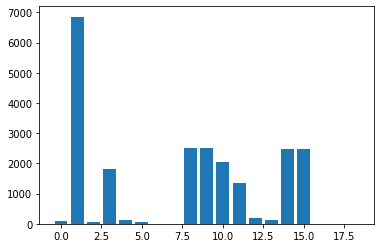

In [151]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()